In [122]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

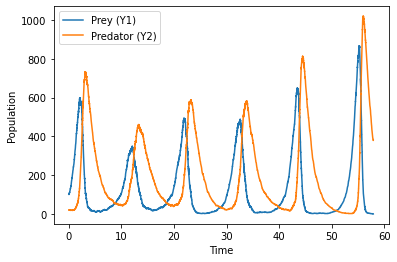

In [130]:


# Define the rates
k1 = 1.0
k2 = 0.005
k3 = 0.6

# Initial populations
Y1 = 100
Y2 = 20

def propensity(Y1, Y2, k1, k2, k3):
    a1 = k1 * Y1
    a2 = k2 * Y1 * Y2
    a3 = k3 * Y2
    return np.array([a1, a2, a3])

def run_lotka_volterra(Y1, Y2, k1, k2, k3):
    time = 0
    population_distribution = []
    time_points = []
    extinction_time = 0
    
    while Y2 > 0 and Y1 > 0:
        a = propensity(Y1, Y2, k1, k2, k3)
        a0 = np.sum(a)
        
        if a0 == 0:
            break
        
        # Generate tau using the inverse transform method
        tau = -math.log(1-random.random()) / a0
        time += tau
        time_points.append(time)
        
        # Determine which reaction occurs
        r = random.random() * a0
        if r < a[0]:
            Y1 += 1
        elif r < a[0] + a[1]:
            Y1 -= 1
            Y2 += 1
        else:
            Y2 -= 1
        
        population_distribution.append([Y1, Y2])
    
    return time, population_distribution, time_points


time, population, time_points = run_lotka_volterra(Y1, Y2, k1, k2, k3)

Y1_values = [item[0] for item in population]
Y2_values = [item[1] for item in population]


plt.plot(time_points, Y1_values, label='Prey (Y1)')
plt.plot(time_points,Y2_values , label='Predator (Y2)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

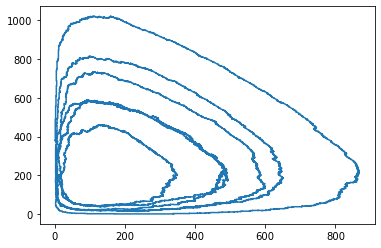

In [131]:
plt.plot(Y1_values, Y2_values)

In [132]:
# Run the simulation 1000 times
Prey_extinct = 0
k = 1000
extintion_times = []
for i in range(0, k):
    time, population, time_points = run_lotka_volterra(Y1, Y2, k1, k2, k3)
    Y1_values = [item[0] for item in population]
    Y2_values = [item[1] for item in population]
    extintion_times.append(time_points[-1])
    if Y1_values[-1] > 0:
        Prey_extinct += 1

print(Prey_extinct / k)

0.026


(array([596., 186.,  88.,  40.,  19.,  19.,   7.,  10.,  11.,   6.,   4.,
          3.,   1.,   2.,   2.,   1.,   1.,   0.,   3.,   1.]),
 array([  3.97407422,  24.92624091,  45.87840759,  66.83057428,
         87.78274097, 108.73490766, 129.68707435, 150.63924104,
        171.59140773, 192.54357442, 213.49574111, 234.44790779,
        255.40007448, 276.35224117, 297.30440786, 318.25657455,
        339.20874124, 360.16090793, 381.11307462, 402.06524131,
        423.017408  ]),
 <BarContainer object of 20 artists>)

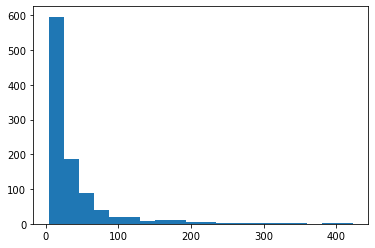

In [116]:
#plot the distributions of extinction times
plt.hist(extintion_times, bins=20)

In [64]:
def count_oscillations(values):
    oscillations = 0
    increasing = False
    for i in range(0, len(values) - 200):
        if values[i] < values[i + 200] and increasing == False: 
            increasing = True
        elif values[i] > values[i + 200] and increasing == True:
            increasing = False
            oscillations += 1
    return oscillations




In [65]:
print(count_oscillations(Y2_values))

13
